In [1]:
import pandas as pd
import numpy as np
import os
from ast import literal_eval
import matplotlib.pyplot as plt

# paper being analyzed: https://www.nature.com/articles/s41586-023-07004-5#Sec3

# generate a dataframe connecting directory with seq_name in their property df

In [33]:
seq_name_list = []
seq_name_dir = []
for root, dirs, files in os.walk('IDROME_larsen/IDRome_v4/', topdown=False):
    for name in files:
        seq_name_list.append(''.join(root.split('/')[2:(len(root.split('/'))-1)]+['_']+[root.split('/')[len(root.split('/'))-1]]))
        seq_name_dir.append(root)
        break
seq_name_dir_df = pd.DataFrame(zip(seq_name_list,seq_name_dir),columns=['seq_name','seq_dir'])
del seq_name_list, seq_name_dir
seq_name_dir_df

,seq_name,seq_dir
0,H0YL14_1_46,IDROME_larsen/IDRome_v4/H0/YL/14/1_46
1,H0YL09_1_131,IDROME_larsen/IDRome_v4/H0/YL/09/1_131
2,H0YKK7_1_89,IDROME_larsen/IDRome_v4/H0/YK/K7/1_89
3,H0YKK7_135_164,IDROME_larsen/IDRome_v4/H0/YK/K7/135_164
4,H0YKK7_430_550,IDROME_larsen/IDRome_v4/H0/YK/K7/430_550
...,...,...
28053,A3QJZ6_111_153,IDROME_larsen/IDRome_v4/A3/QJ/Z6/111_153
28054,A3QJZ7_106_152,IDROME_larsen/IDRome_v4/A3/QJ/Z7/106_152
28055,A3KN83_1001_1044,IDROME_larsen/IDRome_v4/A3/KN/83/1001_1044
28056,A3KN83_1_250,IDROME_larsen/IDRome_v4/A3/KN/83/1_250


# look at the property information from their github

In [56]:
df_idrome_conf = pd.read_csv('conf_prop.csv.gz',index_col=0)
df_idrome_conf.nu = df_idrome_conf.nu.apply(lambda x: round(x,3))
conf_prop = ['nu', 'ete2_Rg2', 'S', 'Delta', 'Rg', 'ete', 'rh', 'SPR']

for seq_name in df_idrome.index:
    df_idrome.loc[seq_name,conf_prop] = df_idrome_conf.loc[seq_name,conf_prop]

In [5]:
# load IDRome database
df_idrome = pd.read_csv('IDRome_DB.csv',index_col=0)
# load data from five independent MD simulations of 33 sequences
df_replicas = pd.read_csv('replicas_data.csv',index_col=0)


In [3]:
df_idrome_conf = pd.read_csv('conf_prop.csv.gz',index_col=0)
df_idrome_conf


,nu,nu_err,S,S_err,Delta,Delta_err,ete2_Rg2,ete2_Rg2_err,Rg,Rg_err,ete,ete_err,rh,rh_err,R0,R0_err,SPR,SPR_err
seq_name,,,,,,,,,,,,,,,,,,
A0A024RBG1_145_181,0.558,0.004400,0.933961,0.084659,0.225950,0.014180,6.304027,0.170574,1.606561,0.009660,3.843011,0.047135,1.403521,0.003884,0.560582,0.007854,10.284649,0.0
A0A075B6T7_1_32,0.525,0.003618,0.901807,0.081148,0.212670,0.012726,6.114494,0.167751,1.448141,0.009249,3.390487,0.043188,1.308675,0.003810,0.599697,0.006589,10.092351,0.0
A0A087WTH1_1_67,0.532,0.001405,0.822738,0.083602,0.199126,0.012490,6.069995,0.167972,2.243991,0.016985,5.283533,0.062448,1.849274,0.005888,0.609978,0.003217,10.160125,0.0
A0A087WTH5_1_132,0.496,0.001813,0.798438,0.116139,0.188978,0.019895,6.150972,0.272686,3.034005,0.033206,7.119714,0.147132,2.471343,0.013120,0.674999,0.005398,10.049124,0.0
A0A087WV53_1_46,0.567,0.001539,0.882210,0.063706,0.214786,0.011787,6.439589,0.147974,1.882622,0.011304,4.607908,0.046243,1.582147,0.004592,0.560475,0.002931,10.212765,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Z4_1_181,0.493,0.001942,0.799905,0.115611,0.210890,0.025691,5.748098,0.270645,3.791956,0.045258,8.607822,0.172981,2.953329,0.016237,0.723369,0.006632,10.006512,0.0
Q9Y6Z5_1_254,0.528,0.000551,0.896173,0.116349,0.221422,0.019193,6.153759,0.232020,4.586832,0.046815,10.808776,0.175821,3.457226,0.016371,0.629167,0.001760,9.830710,0.0
Q9Y6Z7_1_109,0.546,0.001817,0.935857,0.109836,0.216970,0.016440,6.175505,0.213423,3.011145,0.026954,7.113405,0.110314,2.351117,0.009673,0.601631,0.004635,10.025622,0.0


In [4]:
df_idrome_conf.loc[df_idrome_conf.index.str.startswith('A0FG')]

,nu,nu_err,S,S_err,Delta,Delta_err,ete2_Rg2,ete2_Rg2_err,Rg,Rg_err,ete,ete_err,rh,rh_err,R0,R0_err,SPR,SPR_err
seq_name,,,,,,,,,,,,,,,,,,
A0FGR8_656_778,0.555,0.000675,0.955876,0.132036,0.237110,0.024059,6.199479,0.263259,3.321108,0.034889,7.897920,0.144435,2.525748,0.012487,0.589268,0.001736,10.075390,0.0
A0FGR8_1_192,0.481,0.001347,0.852139,0.127642,0.210228,0.019078,5.729191,0.257539,3.691135,0.044820,8.350192,0.172311,2.906350,0.016093,0.721474,0.004642,9.931163,0.0
A0FGR9_449_488,0.536,0.002956,0.902614,0.079948,0.203306,0.011546,6.276624,0.170323,1.677957,0.010665,3.983023,0.050415,1.469749,0.004299,0.604097,0.005809,10.207801,0.0
A0FGR9_580_758,0.506,0.002157,0.893180,0.115256,0.223384,0.024028,5.760317,0.229358,3.947928,0.034959,8.995973,0.169984,3.008173,0.012280,0.713126,0.007255,10.080412,0.0
A0FGR9_1_117,0.489,0.002324,0.812187,0.130078,0.187349,0.020695,6.322405,0.263035,2.663632,0.029643,6.376056,0.107813,2.236265,0.010919,0.651989,0.006496,9.884711,0.0


In [82]:
np.mean(np.load(example_dir+'/rg.npy'))

1.6180889337763165

In [80]:
example_dir = seq_name_dir_df[seq_name_dir_df.seq_name=='A0A3B3IT52_1_34'].seq_dir.values[0]
pd.read_csv(example_dir+'/analysis.csv')

,Unnamed: 0,value,error
0,nu,0.577191,0.005069
1,S,0.943401,0.077595
2,Delta,0.214299,0.013852
3,SPR,10.468680,0.000000
4,ete2_Rg2,6.525359,0.158362
5,Rg,1.617382,0.009415
6,ete,3.956746,0.044813
7,R0,0.566384,0.008924


In [69]:
df_idrome_conf.loc['A0A3B3IT52_1_34']

nu               0.577000
nu_err           0.005069
S                0.943401
S_err            0.077595
Delta            0.214299
Delta_err        0.013852
ete2_Rg2         6.525359
ete2_Rg2_err     0.158362
Rg               1.617382
Rg_err           0.009415
ete              3.956746
ete_err          0.044813
rh               1.412009
rh_err           0.003696
R0               0.566384
R0_err           0.008924
SPR             10.468680
SPR_err          0.000000
Name: A0A3B3IT52_1_34, dtype: float64

In [77]:
df_idrome.loc['A0A3B3IT52_1_34']

UniProt_ID                                     A0A3B3IT52
N                                                      34
nu                                                  0.577
SPR                                              10.46868
ete2_Rg2                                         6.525359
S                                                0.943401
Delta                                            0.214299
Rg/nm                                            1.617382
Ree/nm                                           3.956746
Rh/nm                                            1.412009
fK                                               0.058824
fR                                                    0.0
fE                                               0.147059
fD                                                    0.0
faro                                                  0.0
mean_lambda                                      0.348777
shd                                              2.174908
scd           

In [80]:
np.mean(np.load('IDROME_larsen/IDRome_v4/Q9/94/57/1_97/ete.npy')**2)/np.mean(np.load('IDROME_larsen/IDRome_v4/Q9/94/57/1_97/rg.npy')**2)

5.702845567857474

In [84]:
np.mean(np.load('IDROME_larsen/IDRome_v4/Q9/94/57/1_97/ete.npy'))

5.3319187

In [81]:
df_idrome.loc['Q99457_1_97']

UniProt_ID                                                  Q99457
N                                                               97
nu                                                             0.4
SPR                                                      10.098006
ete2_Rg2                                                  5.713866
S                                                         0.850403
Delta                                                     0.198804
Rg/nm                                                     2.386679
Ree/nm                                                    5.348778
Rh/nm                                                     2.032433
fK                                                        0.030928
fR                                                        0.082474
fE                                                        0.082474
fD                                                        0.041237
faro                                                      0.03

# look at specific IDR using pyconformap

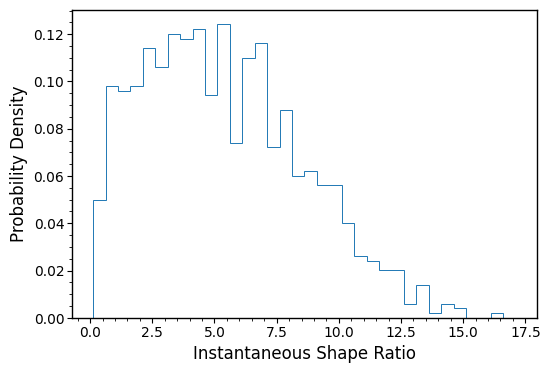

In [13]:
fig,ax=plt.subplots(figsize=(6,4))
#plt.gcf().set_size_inches(3.4, 1.8)
#fig.subplots_adjust(wspace=0.38)
#chain_length=50

ax.hist(Q99457_1_97_Rs,
        label='Q99457_1_97',
        histtype='step',linestyle=('solid'),density=True,
       bins=np.arange(np.min(Q99457_1_97_Rs),np.max(Q99457_1_97_Rs),0.5),
       linewidth=0.7)

        

#line_GW=Line2D([0], [0], label=f'GW', color=color_GW,linewidth=0.7)
#line_RW=Line2D([0], [0], label=f'RW', color=color_RW,linewidth=0.7)
#line_SAW=Line2D([0], [0], label=f'SAW', color=color_SAW,linewidth=0.7)
#handles=[line_GW,line_RW,line_SAW]

ax.set_ylabel('Probability Density',fontsize=12)

#label=r'$R_g\left/R_g^{mean}\right.$'
label='Instantaneous Shape Ratio'
ax.set_xlabel(label,fontsize=12)

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1)
    
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=10, width = 0.8, pad = 2)
ax.tick_params(axis='both', which='minor', width = 0.6)    

#fig.legend(handles=handles,fontsize=8,ncol=3,bbox_to_anchor=(0.87,1.08))

#plt.tight_layout()

# plt.savefig('figures/Rg_Rg_mean_distribution_ratio_single_chain_length_GW_RW_SAW.pdf',format='pdf',
#             dpi = 1000, bbox_inches='tight')
#plt.savefig('figures/Rg_Rg_mean_distribution_ratio_single_chain_length_GW_RW_SAW.tif',format='tiff',
#            dpi = 1000, bbox_inches='tight')



In [41]:
exec(open("pyconformap_modified.py").read())

In [38]:
Q99457_1_97_Rs = np.load('IDROME_larsen/IDRome_v4/Q9/94/57/1_97/ete.npy')**2/np.load('IDROME_larsen/IDRome_v4/Q9/94/57/1_97/rg.npy')**2
Q99457_1_97_Rg2 = np.load('IDROME_larsen/IDRome_v4/Q9/94/57/1_97/rg.npy')**2
Q99457_1_97_Ree2 = np.load('IDROME_larsen/IDRome_v4/Q9/94/57/1_97/ete.npy')**2
pd.DataFrame(zip(Q99457_1_97_Rg2,Q99457_1_97_Ree2),columns=['Rg2','Ree2']).to_csv('Q99457_1_97.csv',index=False)

In [42]:
map_2d_Q99457_1_97 = PyConforMap('Q99457_1_97.csv')

100.00% of protein/polymer snapshots are close to at least 1 GW snapshot


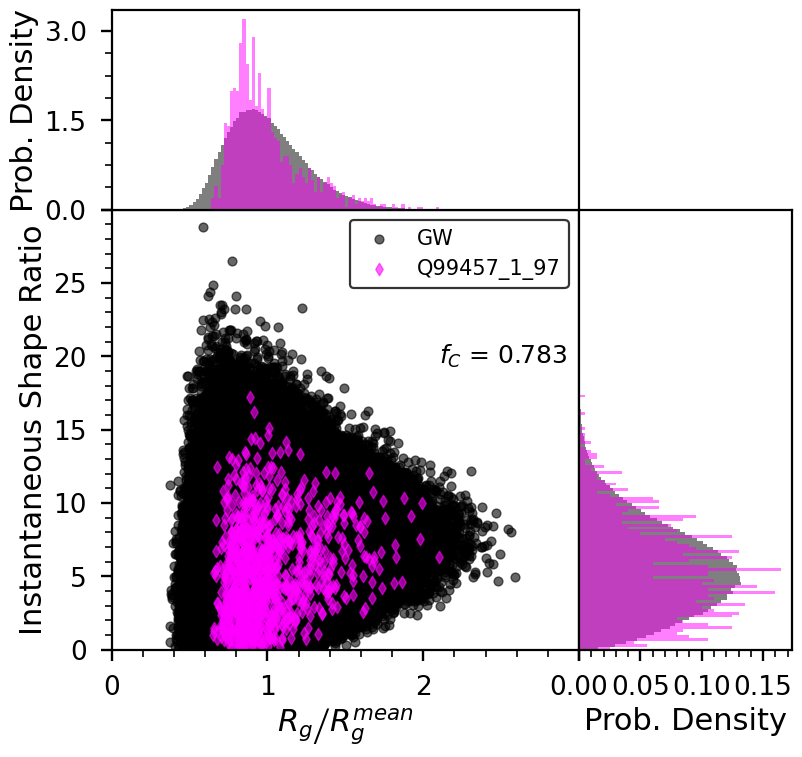

In [43]:
map_2d_Q99457_1_97.plot_protein_against_GW('Q99457_1_97')

this might take a couple of minutes
if it takes too long to run, please consider a lower no_dots value (default set at 20)


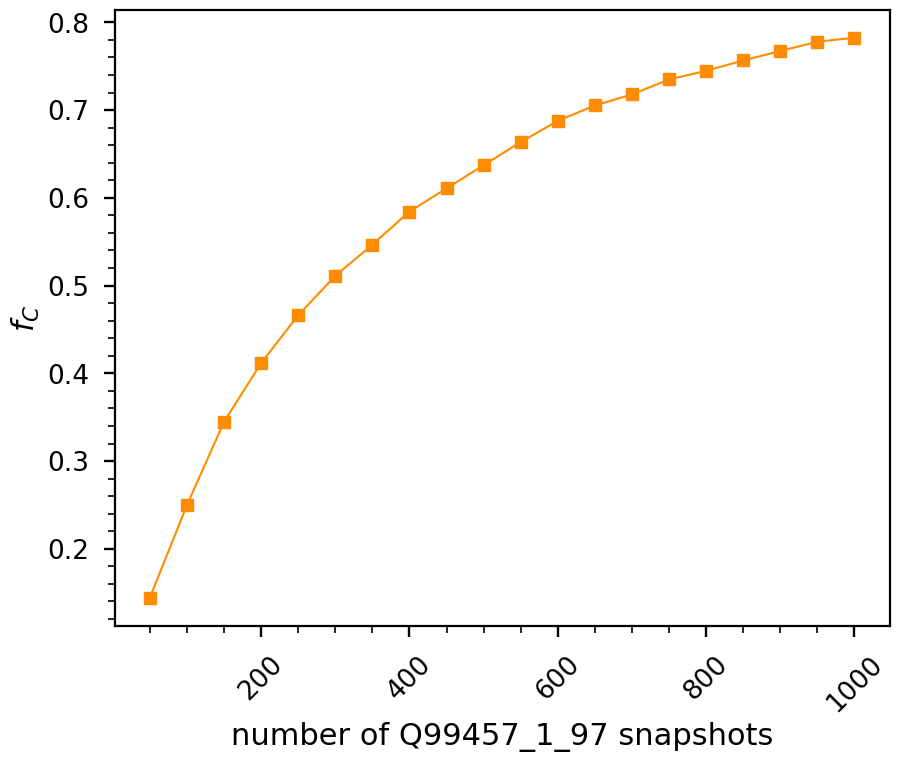

In [41]:
map_2d_Q99457_1_97.vary_protein('Q99457_1_97')

In [50]:
df_idrome[df_idrome.fdomain>=0.8]

,UniProt_ID,N,nu,SPR,ete2_Rg2,S,Delta,Rg/nm,Ree/nm,Rh/nm,...,gene_name,QCDpred,z_delta_+-,z_omega_pi,z_omega_+,z_omega_-,z_omega_h,fdomain,nu_svr,SPR_svr
seq_name,,,,,,,,,,,,,,,,,,,,,
A0A1B0GV03_209_249,A0A1B0GV03,41,0.571,10.454303,6.498190,0.934337,0.226920,1.843086,4.491087,1.556355,...,GOLGA6L7,0.106202,-1.14479,0.000000,-0.078698,0.923740,-2.326676,0.975610,0.547,10.336
A0A1B0GVH4_1_220,A0A1B0GVH4,220,0.472,9.945163,5.895987,0.760346,0.216295,3.847408,8.838498,3.090717,...,PRSS51,0.457748,0.00000,0.000000,1.441585,0.000000,1.807514,0.895455,0.504,9.962
A0A1B0GVS7_1_189,A0A1B0GVS7,189,0.533,10.126613,6.214737,0.854391,0.216503,4.187725,9.967685,3.174457,...,MDFIC2,0.262588,0.00000,0.000000,0.000000,-0.362462,-0.019548,0.846561,0.546,10.094
A0A1B0GVX0_1_72,A0A1B0GVX0,72,0.509,10.054329,6.034974,0.844846,0.201371,2.223540,5.190548,1.859103,...,LITAFD,0.875869,0.00000,0.202329,0.000000,0.000000,-1.453199,0.972222,0.524,10.016
A0FGR9_449_488,A0FGR9,40,0.536,10.207801,6.276624,0.902614,0.203306,1.677957,3.983023,1.469749,...,ESYT3,0.252935,0.00000,-0.178603,0.751360,0.000000,-1.734876,0.975000,0.530,10.223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6I4_273_309,Q9Y6I4,37,0.562,10.148140,6.439653,0.913397,0.216953,1.609346,3.918793,1.409948,...,USP3,0.322493,0.00000,0.000000,0.000000,0.000000,-0.970551,0.972973,0.553,10.253
Q9Y6Q2_563_619,Q9Y6Q2,57,0.525,10.223712,6.319621,0.928919,0.219760,2.056536,4.892311,1.737282,...,STON1,0.557385,0.00000,0.000000,1.524884,0.000000,-1.940226,0.982456,0.529,10.174
Q9Y6S9_230_386,Q9Y6S9,157,0.521,9.966080,6.047843,0.901630,0.192483,3.573470,8.391120,2.760214,...,RPS6KL1,0.134408,0.00000,0.000000,-1.049240,0.000000,0.482885,0.993631,0.515,10.004


In [46]:
A0A1B0GV03_209_249_Rs = np.load('IDROME_larsen/IDRome_v4/A0/A1/B0/GV03/209_249/ete.npy')**2/np.load('IDROME_larsen/IDRome_v4/A0/A1/B0/GV03/209_249/rg.npy')**2
A0A1B0GV03_209_249_Rg2 = np.load('IDROME_larsen/IDRome_v4/A0/A1/B0/GV03/209_249/rg.npy')**2
A0A1B0GV03_209_249_Ree2 = np.load('IDROME_larsen/IDRome_v4/A0/A1/B0/GV03/209_249/ete.npy')**2
pd.DataFrame(zip(A0A1B0GV03_209_249_Rg2,A0A1B0GV03_209_249_Ree2),columns=['Rg2','Ree2']).to_csv('A0A1B0GV03_209_249.csv',index=False)

In [45]:
map_2d_A0A1B0GV03_209_249 = PyConforMap('A0A1B0GV03_209_249.csv')

100.00% of protein/polymer snapshots are close to at least 1 GW snapshot


In [46]:
map_2d_A0A1B0GV03_209_249.bounded_fraction

1.0

In [49]:
map_2d_A0A1B0GV03_209_249.plot_protein_against_GW('A0A1B0GV03_209_249')
plt.close()

In [50]:
map_2d_A0A1B0GV03_209_249.fC_value

0.7850194444444445

In [57]:

O75093_1109_1146_Rs = np.load('IDROME_larsen/IDRome_v4/O7/50/93/1109_1146/ete.npy')**2/np.load('IDROME_larsen/IDRome_v4/O7/50/93/1109_1146/rg.npy')**2
O75093_1109_1146_Rg2 = np.load('IDROME_larsen/IDRome_v4/O7/50/93/1109_1146/rg.npy')**2
O75093_1109_1146_Ree2 = np.load('IDROME_larsen/IDRome_v4/O7/50/93/1109_1146/ete.npy')**2
pd.DataFrame(zip(O75093_1109_1146_Rg2,O75093_1109_1146_Ree2),columns=['Rg2','Ree2']).to_csv('O75093_1109_1146.csv',index=False)

100.00% of protein/polymer snapshots are close to at least 1 GW snapshot


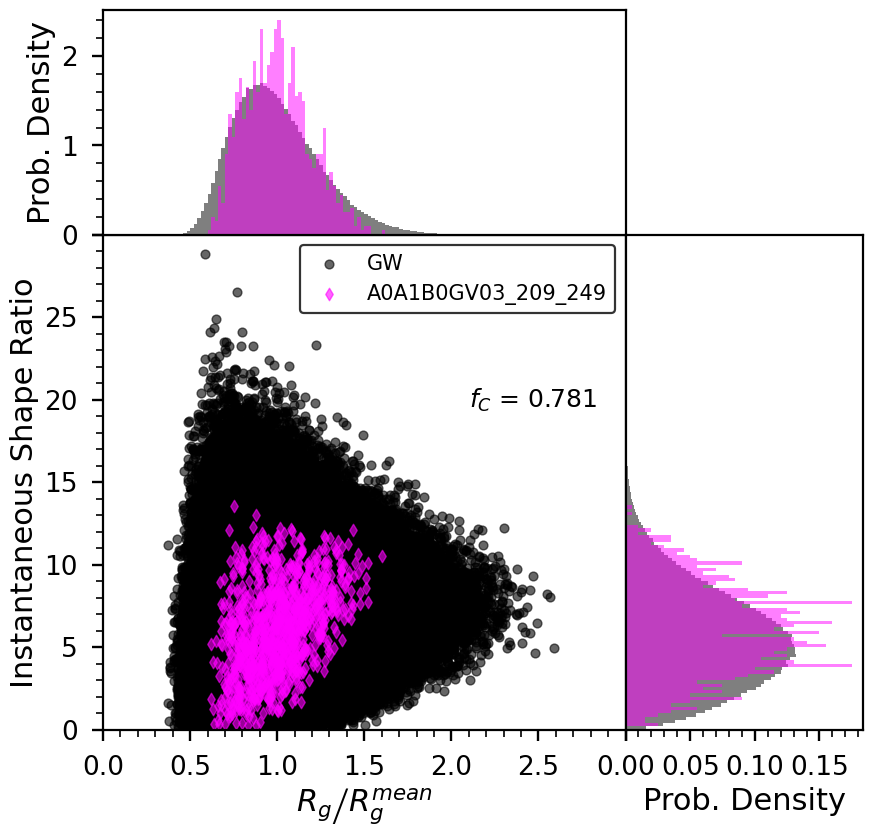

In [58]:
map_2d_O75093_1109_1146 = PyConforMap('O75093_1109_1146.csv')
map_2d_O75093_1109_1146.plot_protein_against_GW('A0A1B0GV03_209_249')

In [99]:
%%time
map_2d_O75093_1109_1146 = PyConforMap('O75093_1109_1146.csv')
map_2d_O75093_1109_1146.fC_using_cdist(upto_protein_snapshots = map_2d_O75093_1109_1146.protein_rg2.shape[0],
                                       GW_every_ith_snap=map_2d_O75093_1109_1146.GW_df.shape[0],protein_name='O75093_1109_1146.csv')


100.00% of protein/polymer snapshots are close to at least 1 GW snapshot
CPU times: user 4.73 s, sys: 36.9 ms, total: 4.77 s
Wall time: 4.78 s


0.7814513888888889

In [101]:
((4.78 * 28058)/60)/60

37.254788888888896